In [12]:
# Data Read
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

processed_dir = "../processed/"

dataset = pd.read_csv(processed_dir + "rssi_processed_indoor_down.csv", index_col=0)
means = dataset.mean(axis=0)
medians = dataset.median(axis=0)
stds = dataset.std(axis=0)
missing = dataset.isna().mean() * 100
print("Means (RSSI Values)\n",means)
print("\nMedians (RSSI Values)\n", medians)
print("\nStandard Deviations\n", stds)
print("\nMissed Scans (%)\n",missing)

Means (RSSI Values)
 0.5m   -80.704000
1.0m   -89.512000
1.5m   -91.952000
2.0m   -92.991903
2.5m   -90.292000
dtype: float64

Medians (RSSI Values)
 0.5m   -81.0
1.0m   -90.0
1.5m   -92.0
2.0m   -93.0
2.5m   -90.0
dtype: float64

Standard Deviations
 0.5m    0.869141
1.0m    1.655542
1.5m    1.485437
2.0m    1.175605
2.5m    1.928110
dtype: float64

Missed Scans (%)
 0.5m    0.0
1.0m    0.0
1.5m    0.0
2.0m    1.2
2.5m    0.0
dtype: float64


In [13]:
# Setup Measured Power Data Frame
def createEstDistance(mPower, avg, environment):
    return float(avg[0][:-1]) - 10 ** ( (mPower - avg[1]) / (10 * environment) )
    #return 10 ** ( (mPower - avg[1]) / (10 * environment) )

environments = 4
def createMeasuredPowerFrame(data, averages, env):
    powerVals = pd.Series(np.linspace(-100, -50, 51))
    powerVals.name = "Measured Power"
    vals=[powerVals]
    for avg in averages.iteritems():
        series = powerVals.apply(lambda val: createEstDistance(val, avg, env) )
        series.name=avg[0]
        vals.append(series)
    temp = pd.concat(vals, axis=1).set_index("Measured Power")
    temp["Mean"] = temp.mean(axis=1)
    temp["Median"] = temp.median(axis=1)
    return temp

measuredPowers = {"means": {}, "medians": {}}
for i in range(1, environments + 1):
    measuredPowers["means"][i] = createMeasuredPowerFrame(dataset, means, i)
    measuredPowers["medians"][i] = createMeasuredPowerFrame(dataset, medians, i)

Text(0, 0.5, 'RSSI Value (Higher Values Stronger)')

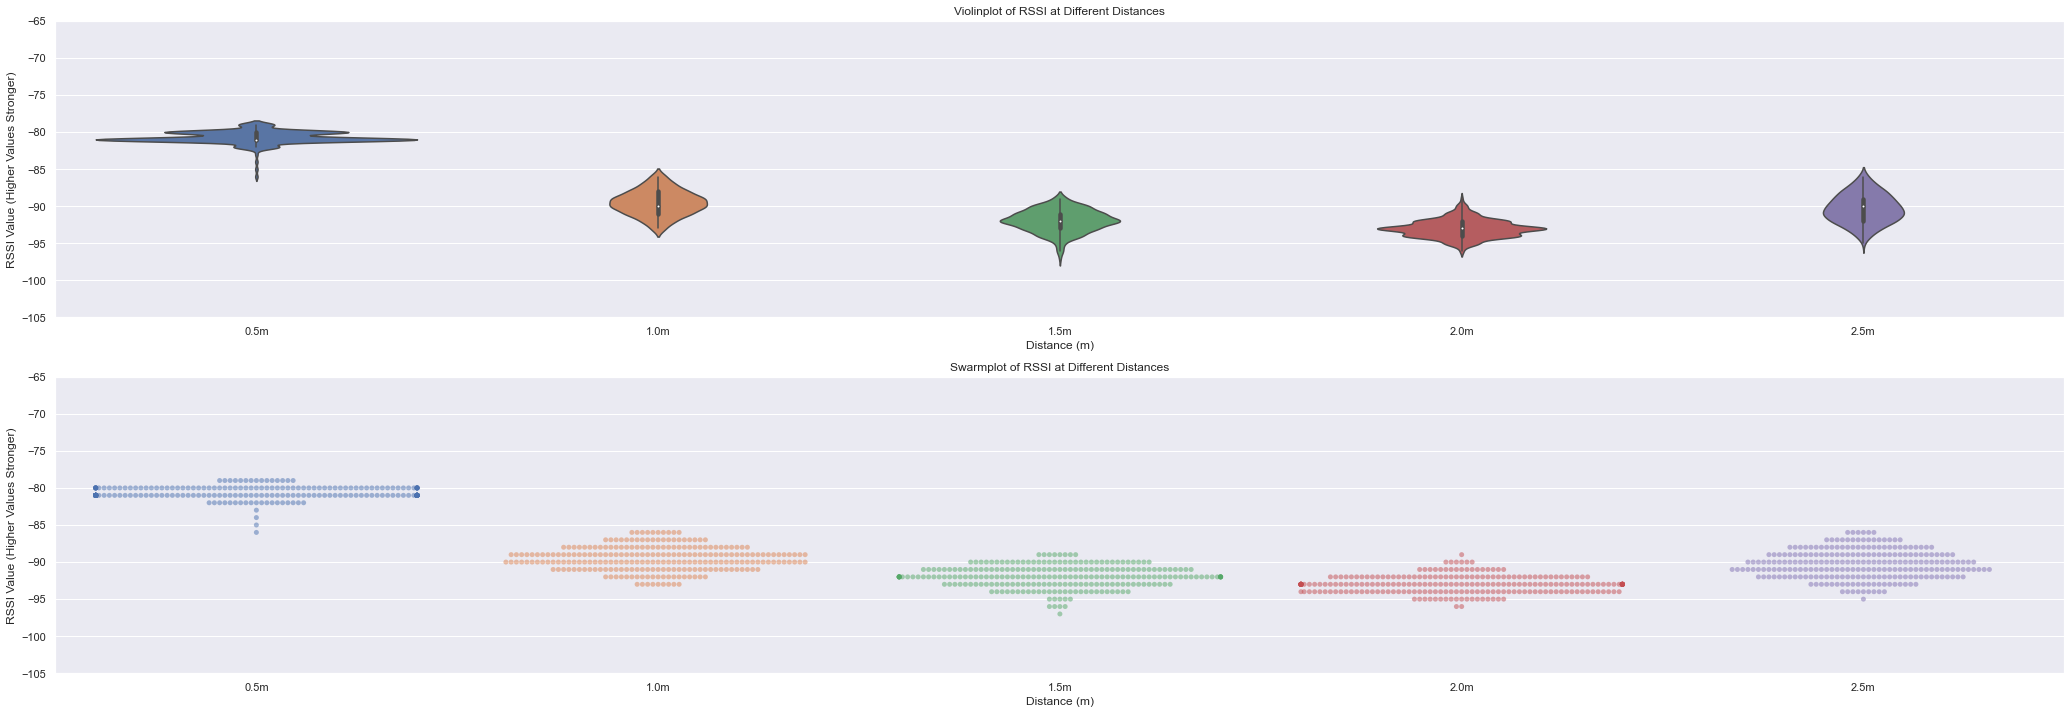

In [14]:
# Raw data Violin / swarmplot
sns.set_theme()

fig, ax = plt.subplots(2,1, figsize=(36, 12))
sns.violinplot(data=dataset, orient="v", alpha=1.0, ax=ax[0]).set_title("Violinplot of RSSI at Different Distances")
sns.swarmplot(data=dataset, alpha=0.5, split=True, ax=ax[1]).set_title("Swarmplot of RSSI at Different Distances")

ax[0].set_xlabel("Distance (m)")
ax[0].set_ylim(-105, -65)
ax[0].set_ylabel("RSSI Value (Higher Values Stronger)")

ax[1].set_xlabel("Distance (m)")
ax[1].set_ylim(-105, -65)
ax[1].set_ylabel("RSSI Value (Higher Values Stronger)")

<Figure size 864x1008 with 0 Axes>

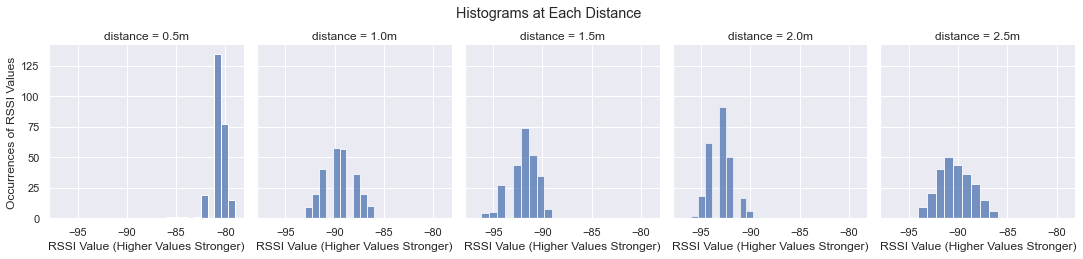

In [15]:
# Raw data histograms
plt.figure(figsize=(12, 14))
melted = dataset.melt(var_name="distance")
g = sns.FacetGrid(data=melted, col="distance")
g.map(sns.histplot, "value", bins=10)

plt.subplots_adjust(top=0.8)
plt.subplots_adjust(bottom=0)
g.fig.suptitle("Histograms at Each Distance")
g.set_xlabels("RSSI Value (Higher Values Stronger)")
g.set_ylabels("Occurrences of RSSI Values")

Text(0, 0.5, 'Density Estimation')

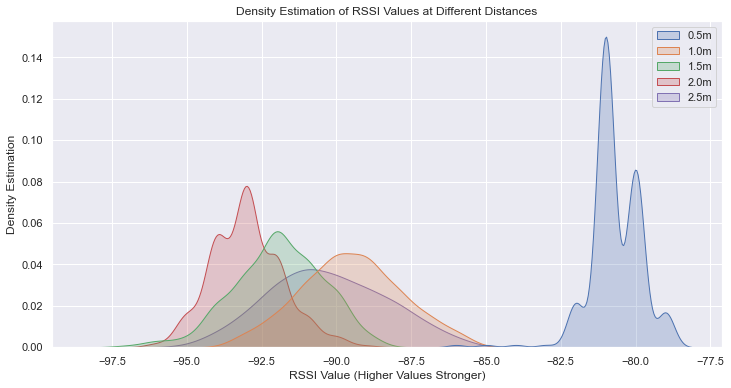

In [16]:
# Raw data density estimation
plt.figure(figsize=(12, 6))
sns.kdeplot(data=dataset, fill=True).set_title("Density Estimation of RSSI Values at Different Distances")

plt.xlabel("RSSI Value (Higher Values Stronger)")
plt.ylabel("Density Estimation")

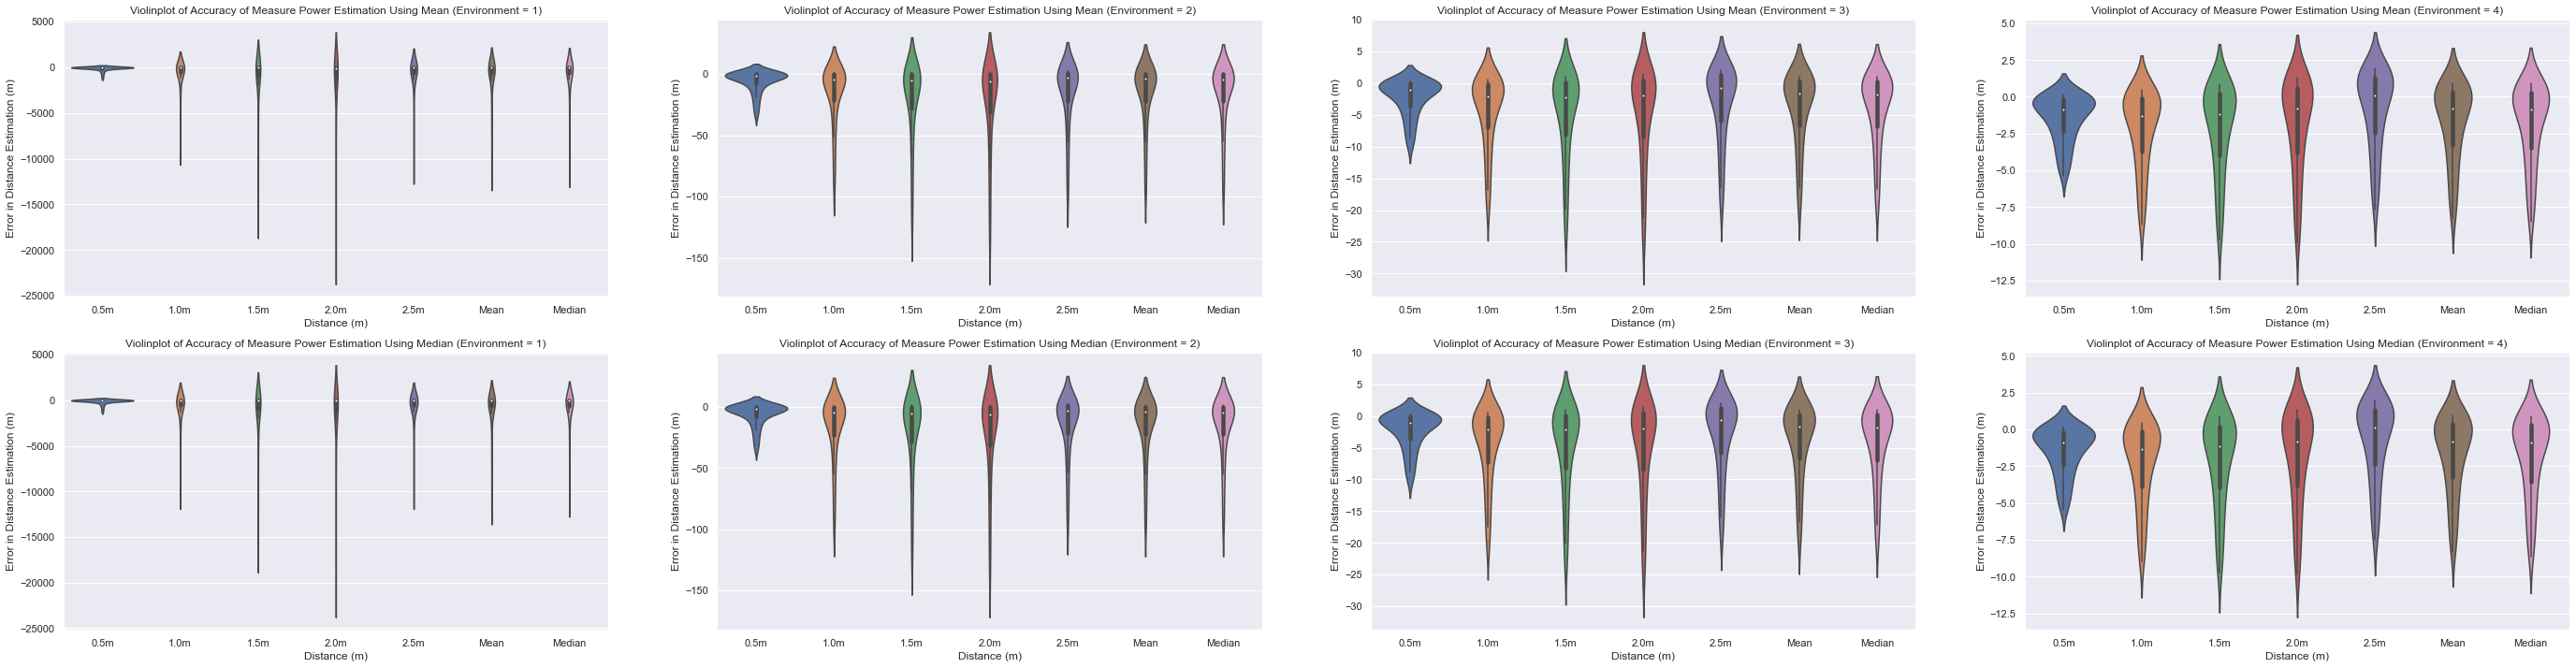

In [17]:
# Measured Power Distance dataset
sns.set_theme()

fig, ax = plt.subplots(2,environments, figsize=(12*environments, 12))
for i in range(0, environments):
    sns.violinplot(data=measuredPowers["means"][i+1], ax=ax[0,i])\
        .set_title("Violinplot of Accuracy of Measure Power Estimation Using Mean (Environment = " + str(i+1) + ")")

    sns.violinplot(data=measuredPowers["medians"][i+1], ax=ax[1,i])\
        .set_title("Violinplot of Accuracy of Measure Power Estimation Using Median (Environment = " + str(i+1) + ")")

    ax[0,i].set_xlabel("Distance (m)")
    ax[0,i].set_ylabel("Error in Distance Estimation (m)")

    ax[1,i].set_xlabel("Distance (m)")
    ax[1,i].set_ylabel("Error in Distance Estimation (m)")

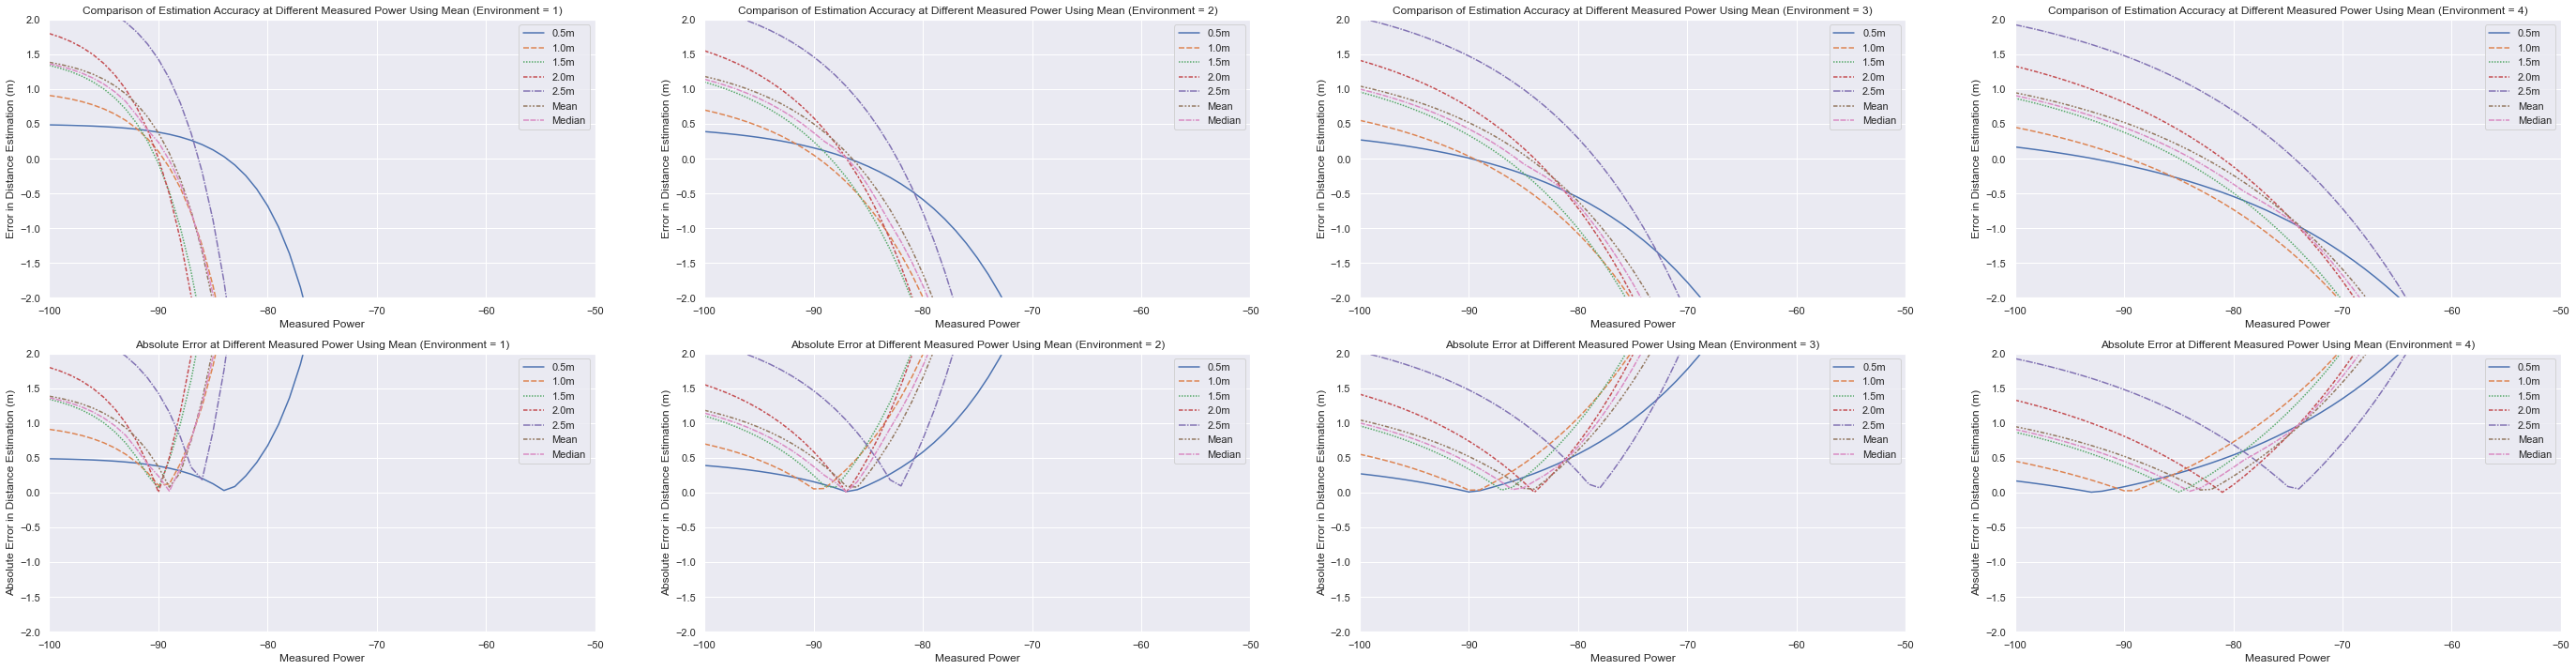

In [18]:
# Estimation Accuracy at Different Measured Power Using Mean
sns.set_theme()

fig, ax = plt.subplots(2,environments, figsize=(12*environments, 12))
for i in range(0, environments):
    sns.lineplot(data=measuredPowers["means"][i+1], ax=ax[0,i])\
        .set_title("Comparison of Estimation Accuracy at Different Measured Power Using Mean (Environment = " + str(i+1) + ")")

    sns.lineplot(data=measuredPowers["means"][i+1].applymap(abs), ax=ax[1,i])\
        .set_title("Absolute Error at Different Measured Power Using Mean (Environment = " + str(i+1) + ")")

    ax[0,i].set_ylim(-2, 2)
    ax[0,i].set_xlim(-100, -50)
    ax[0,i].set_ylabel("Error in Distance Estimation (m)")

    ax[1,i].set_ylim(-2, 2)
    ax[1,i].set_xlim(-100, -50)
    ax[1,i].set_ylabel("Absolute Error in Distance Estimation (m)")

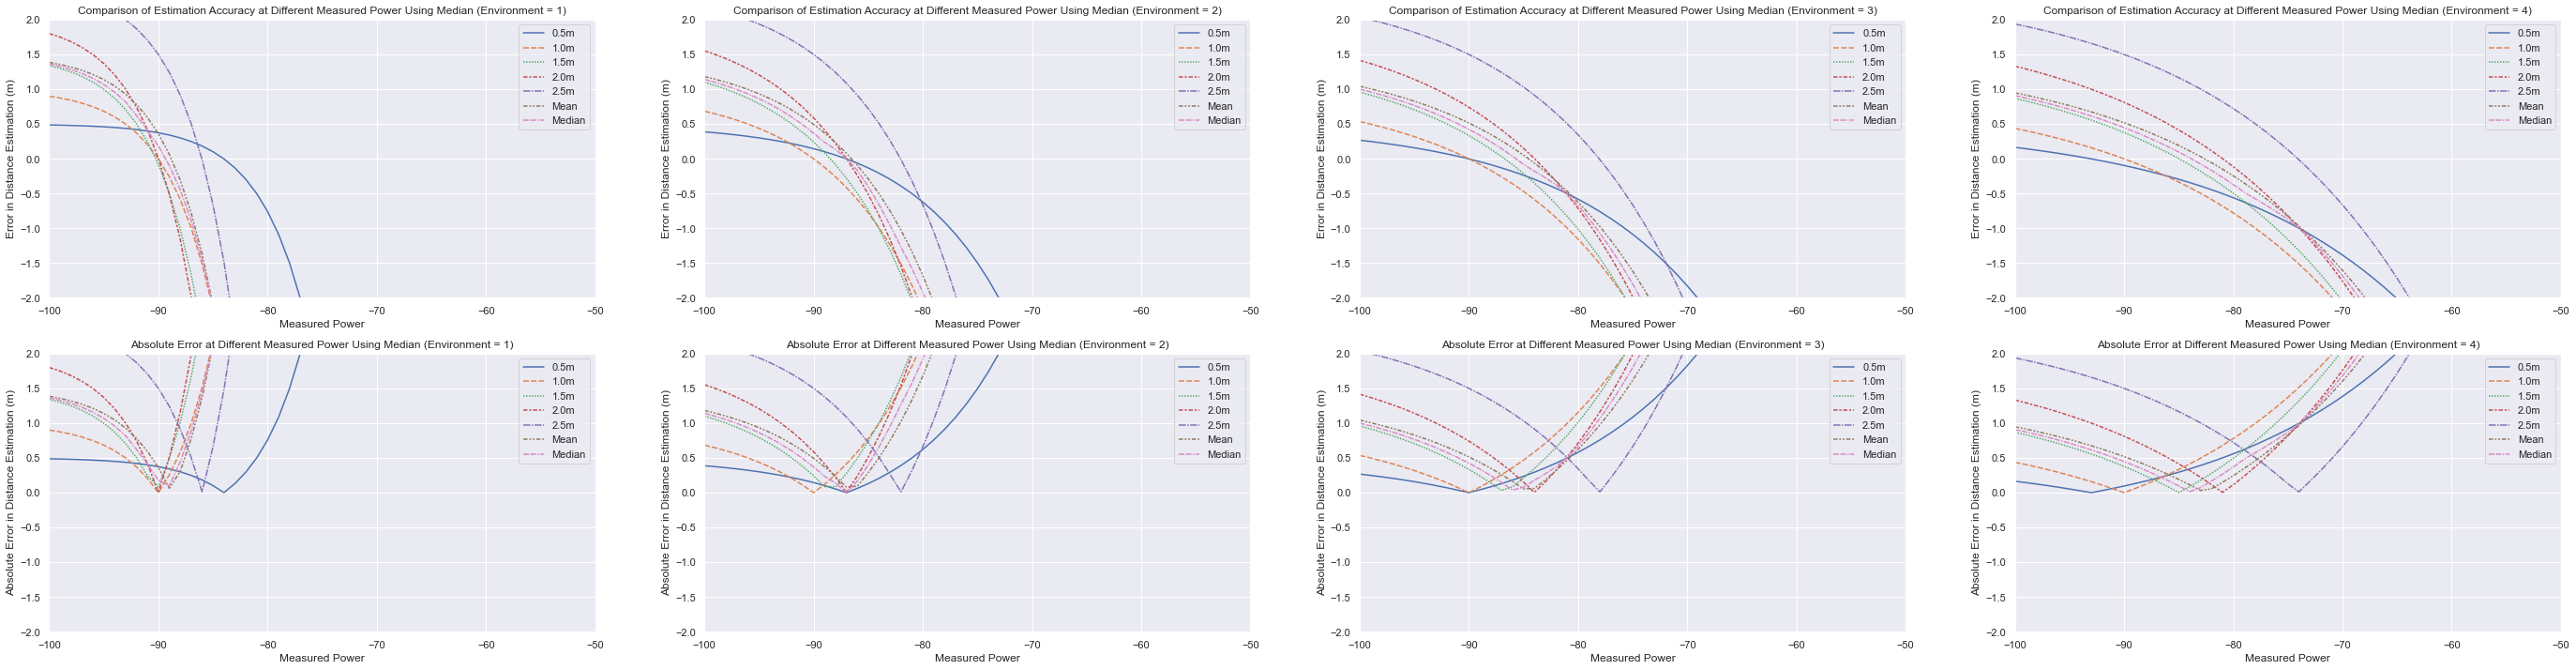

In [19]:
# Estimation Accuracy at Different Measured Power Using Median
sns.set_theme()

fig, ax = plt.subplots(2,environments, figsize=(12*environments, 12))
for i in range(0, environments):
    sns.lineplot(data=measuredPowers["medians"][i+1], ax=ax[0,i])\
        .set_title("Comparison of Estimation Accuracy at Different Measured Power Using Median (Environment = " + str(i+1) + ")")

    sns.lineplot(data=measuredPowers["medians"][i+1].applymap(abs), ax=ax[1,i])\
        .set_title("Absolute Error at Different Measured Power Using Median (Environment = " + str(i+1) + ")")

    ax[0,i].set_ylim(-2, 2)
    ax[0,i].set_xlim(-100, -50)
    ax[0,i].set_ylabel("Error in Distance Estimation (m)")

    ax[1,i].set_ylim(-2, 2)
    ax[1,i].set_xlim(-100, -50)
    ax[1,i].set_ylabel("Absolute Error in Distance Estimation (m)")

In [20]:
# Minimum Error Measured Power Values
print("Mean STDs")
for i in range(1, environments+1):
    print("Environment %d: std = %f, best fit = %d" % (i, measuredPowers["means"][i].applymap(abs).idxmin(axis=0).std(), measuredPowers["means"][i].applymap(abs).idxmin(axis=0).median()))

print("\nMedian STDs")
for i in range(1, environments+1):
    print("Environment %d: std = %f, best fit = %d" % (i, measuredPowers["medians"][i].applymap(abs).idxmin(axis=0).std(), measuredPowers["medians"][i].applymap(abs).idxmin(axis=0).median()))

Mean STDs
Environment 1: std = 2.360387, best fit = -89
Environment 2: std = 2.429972, best fit = -87
Environment 3: std = 4.157609, best fit = -86
Environment 4: std = 6.156684, best fit = -84

Median STDs
Environment 1: std = 2.360387, best fit = -89
Environment 2: std = 2.410295, best fit = -87
Environment 3: std = 4.111540, best fit = -86
Environment 4: std = 6.156684, best fit = -84


Text(0, 0.5, 'Absolute Error in Distance Estimation (m)')

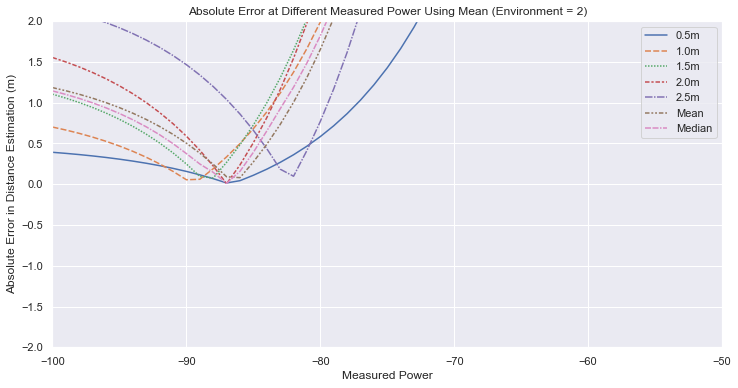

In [22]:
sns.set_theme()
plt.figure(figsize=(12, 6))

sns.lineplot(data=measuredPowers["means"][2].applymap(abs))\
        .set_title("Absolute Error at Different Measured Power Using Mean (Environment = " + str(2) + ")")

plt.ylim(-2, 2)
plt.xlim(-100, -50)
plt.ylabel("Absolute Error in Distance Estimation (m)")